# 1. Data

In [7]:
# Import the libraries 
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from collections import defaultdict
from queue import PriorityQueue

In [8]:
%cd C:\Users\Administrator\Capstone Project\AI_Project\Data
%pwd C:\Users\Administrator\Capstone Project\AI_Project\Data

C:\Users\Administrator\Capstone Project\AI_Project\Data


'C:\\Users\\Administrator\\Capstone Project\\AI_Project\\Data'

In [9]:
# Read data from CSV file
df = pd.read_csv("Distance_Data.csv", sep =";")

#Convert comma objects to float
def obj_to_float(object):
    if object == "0":
        return int(object)
    else:
        list_obj = list(object)
        i = 0
        while i < len(object):
            if object[i] == ",":
                list_obj[i] = "."
                object = float("".join(list_obj))
                break
            i += 1 
        return object
for row in range(0,63):
    df.loc[row] = df.loc[row].apply(obj_to_float)

In [10]:
df.head(10)

,Province,Ho Chi Minh,Ha Noi,Hai Phong,Can Tho,Dong Nai,Quang Nam,Bac Ninh,Hai Duong,Nghe An,...,Ha Nam,Hung Yen,Kien Giang,Lai Chau,Da Nang,Dak Nong,Dien Bien,Vinh Phuc,Latitude,Longitude
0,Ho Chi Minh,0,1160.328125,1116.327582,124.340009,30.55865,597.455091,1160.851404,1132.378709,885.694721,...,1094.960639,1124.167884,253.245571,1338.581425,612.139008,197.376884,1284.528508,1184.499927,10.7638,106.6436
1,Ha Noi,1160.328125,0,126.38586,1235.554616,1144.991818,656.690777,59.499238,88.532125,274.868404,...,75.458333,61.937428,1253.715745,264.688208,632.876926,1012.092866,258.96915,25.156596,21.1382,105.505
2,Hai Phong,1116.327582,126.38586,0,1201.305114,1098.305041,575.045991,74.855725,38.212372,257.613414,...,81.046226,67.797153,1233.502621,388.365117,552.14268,954.6847,385.354979,131.855404,20.8,106.6667
3,Can Tho,124.340009,1235.554616,1201.305114,0,154.836491,706.31833,1240.919573,1214.553251,961.075782,...,1173.594679,1203.685561,141.402052,1397.101956,719.138646,318.316161,1340.06003,1260.217144,10.0333,105.7833
4,Dong Nai,30.55865,1144.991818,1098.305041,154.836491,0,572.923473,1144.164266,1115.131849,870.755857,...,1078.756363,1107.678552,282.901262,1327.577244,588.20148,169.248401,1274.383073,1168.99858,10.9277,106.8681
5,Quang Nam,597.455091,656.690777,575.045991,706.31833,572.923473,0,636.558314,601.364525,418.718159,...,582.011355,604.903988,783.239711,894.008171,24.107828,409.374779,858.319831,676.81211,15.8777,108.3327
6,Bac Ninh,1160.851404,59.499238,74.855725,1240.919573,1144.164266,636.558314,0,38.05668,282.368835,...,68.89235,37.605862,1265.709719,314.368045,613.169504,1005.653147,314.828769,58.161909,21.1861,106.0763
7,Hai Duong,1132.378709,88.532125,38.212372,1214.553251,1115.131849,601.364525,38.05668,0,260.821728,...,58.062429,34.034401,1242.59758,350.219441,578.123905,974.505486,347.423565,93.797789,20.9399,106.3309
8,Nghe An,885.694721,274.868404,257.613414,961.075782,870.755857,418.718159,282.368835,260.821728,0,...,213.844712,244.772335,983.347399,480.001397,394.764678,741.845677,440.462669,299.321783,18.6733,105.6922
9,Hue,642.206796,564.393366,492.055952,741.509381,620.696956,102.61602,548.920839,515.265967,317.697656,...,490.82882,515.560339,802.268996,795.379163,79.588454,467.064339,758.012115,585.580009,16.4637,107.5908


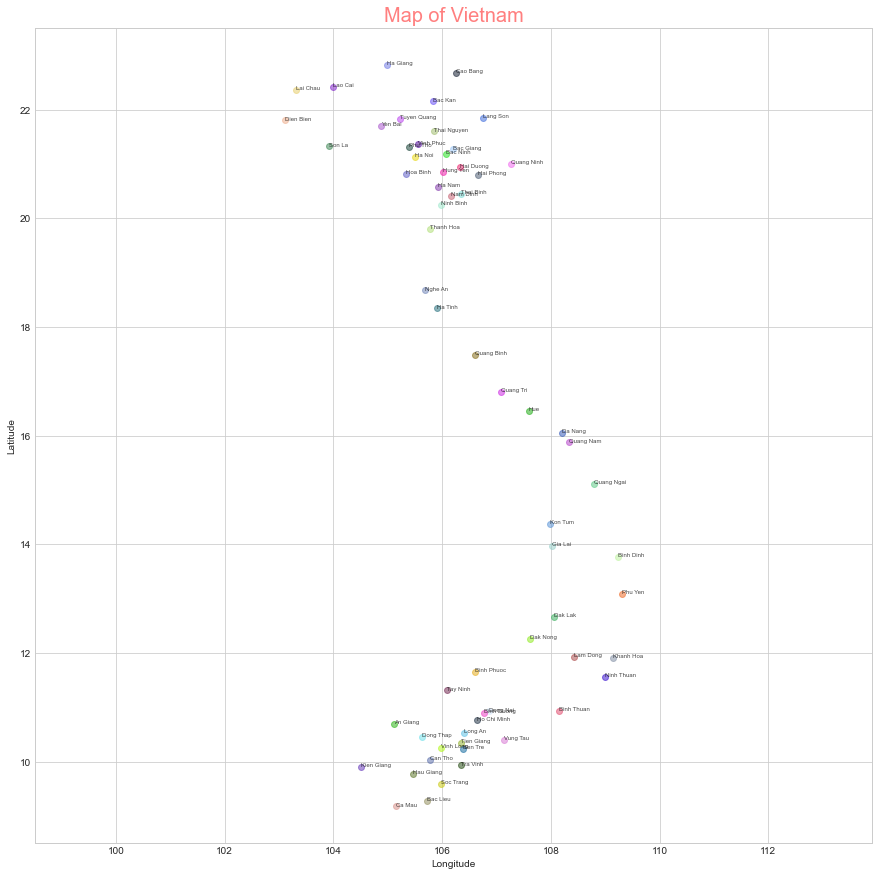

In [11]:
# Visualize
Longitude, Latitude, Province = df["Longitude"],df["Latitude"],df["Province"]

# change style plt
plt.style.available
plt.style.use('seaborn-whitegrid')

# size fig
plt.figure(figsize = (15,15))

# scatter
# plt.scatter(Longitude,Latitude, c = color, alpha = 0.4)

for x, y in zip(Longitude, Latitude):
    rgb = np.random.rand(3,)
    plt.scatter(x, y, c=[rgb], alpha = 0.5)

plt.axis([100,112,8,30])
plt.axis("equal")

# label
plt.title("Map of Vietnam", color = "red",fontsize = 20, alpha = 0.5)
plt.xlabel("Longitude", fontsize = 10)
plt.ylabel("Latitude", fontsize = 10)

for i in range(len(Province)):
    plt.text(Longitude[i],Latitude[i],Province[i],color = "black", fontsize = 6,alpha = 0.7)
# show
plt.show();

In [12]:
# Create START & END
start = str(input("START: ")).strip().title()
end = str(input("END: ")).strip().title()

# Time Clock 
start_time = time.time()

# Create id for START & END 
for i in range(len(df)):
    if df.iloc[i,0] == start:
        start_id = i
    elif df.iloc[i,0] == end:
        end_id = i

print("{} has ID {}.".format(start,start_id))
print("{} has ID {}.".format(end,end_id))

START: Ha Noi
END: Can Tho
Ha Noi has ID 1.
Can Tho has ID 3.


In [13]:
# Distance limit for each region of Vietnam
divide_region = pd.read_excel("Distance_Limit_Region.xlsx")
divide_region

,Region,Min Latitude,Max Latitude,Min Longtitude,Max Latitude.1,Distance Limit
0,Dien Bien & Ha Giang & Tuyen Quang,21.3,22.90,103.10,105.30,130.0
1,Cao Bang & Bac Kan & Lang Son,21.6,22.70,105.83,106.76,120.0
2,Central of Vietnam,15.8,19.90,103.00,110.00,130.0
3,Tay Nguyen,10.9,15.13,103.00,110.00,150.0
4,Southern Vietnam,NaN,NaN,NaN,NaN,NaN


In [14]:
df.sort_values(["Latitude","Longitude"], ascending = False).head()

,Province,Ho Chi Minh,Ha Noi,Hai Phong,Can Tho,Dong Nai,Quang Nam,Bac Ninh,Hai Duong,Nghe An,...,Ha Nam,Hung Yen,Kien Giang,Lai Chau,Da Nang,Dak Nong,Dien Bien,Vinh Phuc,Latitude,Longitude
51,Ha Giang,1352.918818,194.995391,284.345853,1425.172286,1338.19436,848.62821,214.148122,251.440063,467.447553,...,267.373888,243.788249,1437.447588,178.95988,825.012985,1206.893356,223.851672,172.732118,22.8233,104.9836
49,Cao Bang,1325.32984,187.238063,212.746005,1406.800444,1308.088317,786.798177,166.366899,192.964472,448.665957,...,234.869734,203.922445,1432.008074,303.76886,764.124483,1166.653531,337.640291,162.947375,22.6731,106.25
46,Lao Cai,1326.705848,211.265259,329.802471,1390.814836,1314.216734,858.412404,254.981083,292.181997,452.606246,...,285.490088,272.166549,1392.630544,70.475966,834.364649,1192.724801,114.206795,198.831638,22.4194,103.995
58,Lai Chau,1338.581425,264.688208,388.365117,1397.101956,1327.577244,894.008171,314.368045,350.219441,480.001397,...,335.349589,326.621102,1391.712769,0,869.900343,1212.707626,66.217257,256.548751,22.368662,103.311913
53,Bac Kan,1269.542718,117.830167,173.081894,1347.906722,1253.216073,745.4549,110.166432,144.091409,387.165575,...,174.61853,145.655195,1369.251973,261.122764,722.212749,1115.653387,284.226378,92.901412,22.1514,105.8377


In [16]:
df[(df["Latitude"] > 10.9) & (df["Latitude"] < 15.13) & (df["Longitude"] > 103) & (df["Longitude"] < 110)][["Province","Latitude", "Longitude"]].head()

,Province,Latitude,Longitude
4,Dong Nai,10.9277,106.8681
11,Khanh Hoa,11.9136,109.1369
13,Dak Lak,12.6667,108.05
17,Binh Dinh,13.7696,109.2314
22,Quang Ngai,15.1206,108.7922


In [17]:
df.head(6)

,Province,Ho Chi Minh,Ha Noi,Hai Phong,Can Tho,Dong Nai,Quang Nam,Bac Ninh,Hai Duong,Nghe An,...,Ha Nam,Hung Yen,Kien Giang,Lai Chau,Da Nang,Dak Nong,Dien Bien,Vinh Phuc,Latitude,Longitude
0,Ho Chi Minh,0,1160.328125,1116.327582,124.340009,30.55865,597.455091,1160.851404,1132.378709,885.694721,...,1094.960639,1124.167884,253.245571,1338.581425,612.139008,197.376884,1284.528508,1184.499927,10.7638,106.6436
1,Ha Noi,1160.328125,0,126.38586,1235.554616,1144.991818,656.690777,59.499238,88.532125,274.868404,...,75.458333,61.937428,1253.715745,264.688208,632.876926,1012.092866,258.96915,25.156596,21.1382,105.505
2,Hai Phong,1116.327582,126.38586,0,1201.305114,1098.305041,575.045991,74.855725,38.212372,257.613414,...,81.046226,67.797153,1233.502621,388.365117,552.14268,954.6847,385.354979,131.855404,20.8,106.6667
3,Can Tho,124.340009,1235.554616,1201.305114,0,154.836491,706.31833,1240.919573,1214.553251,961.075782,...,1173.594679,1203.685561,141.402052,1397.101956,719.138646,318.316161,1340.06003,1260.217144,10.0333,105.7833
4,Dong Nai,30.55865,1144.991818,1098.305041,154.836491,0,572.923473,1144.164266,1115.131849,870.755857,...,1078.756363,1107.678552,282.901262,1327.577244,588.20148,169.248401,1274.383073,1168.99858,10.9277,106.8681
5,Quang Nam,597.455091,656.690777,575.045991,706.31833,572.923473,0,636.558314,601.364525,418.718159,...,582.011355,604.903988,783.239711,894.008171,24.107828,409.374779,858.319831,676.81211,15.8777,108.3327


In [19]:
# Create data for processing

# defaultdict means that if a key is not found in the dictionary, then instead of a KeyError being thrown, a new entry is created.
# The type of this new entry is given by the argument of defaultdict.
# Below, default items are created using list(), which returns a new empty list object.
data = defaultdict(list) #create data
over = []

# scan each city to finding neighbor city
for i in range (df.shape[0]): 
    # add data for each index (each iter)
    lst = []

    # add neighbor city if 0 < distance < n (n depend on region)
    for j in range(1,df.shape[0]+1):
        if (21.3 < df.iloc[i,64] < 22.9) and (103.1 < df.iloc[i,65] < 105.3):       # Dien Bien, Ha Giang & Tuyen Quang 
            if 0 < df.iloc[i,j] < 130:
                # add name of each neighbor city
                lst.append(df.iloc[j-1,0])
                # add h(x)
                #lst.append(df.iloc[i,j])

        elif (21.6 < df.iloc[i,64] < 22.7) and (105.83 < df.iloc[i,65] < 106.76):   # Cao Bang, Bac Kan & Lang Son
            if 0 < df.iloc[i,j] < 120:
                lst.append(df.iloc[j-1,0])
                #lst.append(df.iloc[i,j])

        elif (20 < df.iloc[i,64] < 22) and (104.2 < df.iloc[i,65] < 106):      # Hanoi
            if 0 < df.iloc[i,j] < 100:
                lst.append(df.iloc[j-1,0])
                #lst.append(df.iloc[i,j])

        elif (df.iloc[i,64] == 16.4637) and (df.iloc[i,65] == 107.5908):         # Hue 
            if 0 < df.iloc[i,j] < 80:
                lst.append(df.iloc[j-1,0])
                #lst.append(df.iloc[i,j])
        
        elif (df.iloc[i,64] == 16.054407) and (df.iloc[i,65] == 108.202164):         # Da Nang
            if 0 < df.iloc[i,j] < 80:
                lst.append(df.iloc[j-1,0])
                #lst.append(df.iloc[i,j])

        elif (df.iloc[i,64] == 15.8777) and (df.iloc[i,65] == 108.3327):         # Quang Nam
            if 0 < df.iloc[i,j] < 100:
                lst.append(df.iloc[j-1,0])
                #lst.append(df.iloc[i,j])

        elif (15.8 < df.iloc[i,64] < 19.9) and (103 < df.iloc[i,65] < 110) and (df.iloc[i,64] != 16.4637) and (df.iloc[i,64] != 15.8777) and (df.iloc[i,65] != 107.5908) and (df.iloc[i,65] != 108.3327):         # Central of Vietnam (-Hue, Quang Nam, Da Nang)
            if 0 < df.iloc[i,j] < 130:
                lst.append(df.iloc[j-1,0])
                #lst.append(df.iloc[i,j])

        elif 12.6 < df.iloc[i,64] < 14.4:      # Kon Tum, Dak Lak & Phu Yen
            if 0 < df.iloc[i,j] < 150:
                lst.append(df.iloc[j-1,0])
                #lst.append(df.iloc[i,j])

        elif (df.iloc[i,64] < 12) and (108 < df.iloc[i,65] < 110):        # Lam Dong, Khanh Hoa, Ninh Thuan & Binh Thuan
            if 0 < df.iloc[i,j] < 120:
                lst.append(df.iloc[j-1,0])
                #lst.append(df.iloc[i,j])

        elif (11.3 < df.iloc[i,64] < 12.3) and (106 < df.iloc[i,65] < 108):        # Dak Nong, Binh Phuoc & Tay Ninh
            if 0 < df.iloc[i,j] < 140:
                lst.append(df.iloc[j-1,0])
                #lst.append(df.iloc[i,j])
        
        elif (df.iloc[i,64] < 12) and (104 < df.iloc[i,65] < 106):        # An Giang, Kien Giang, Vinh Long, Ca Mau
            if 0 < df.iloc[i,j] < 170:
                lst.append(df.iloc[j-1,0])
                #lst.append(df.iloc[i,j])
        
        elif (df.iloc[i,64] < 11) and (106 < df.iloc[i,65] < 108):        # HCM Region
            if 0 < df.iloc[i,j] < 100:
                lst.append(df.iloc[j-1,0])
                #lst.append(df.iloc[i,j])
        else:
            if 0 < df.iloc[i,j] < 120:
                lst.append(df.iloc[j-1,0])
                #lst.append(df.iloc[i,j])
    
    # add h(x) from current city to end city (end of list)
    lst.append(df.iloc[i,end_id+1])
    # add lst to each index of data
    data[df.iloc[i][0]] = lst

print(data["Ha Noi"]) #include neighbor city with limit distance & end = h(x) from Hanoi to end_city
print(data["Hue"])
print(data["Da Nang"])
print(data["Quang Nam"])

['Bac Ninh', 'Hai Duong', 'Thai Nguyen', 'Phu Tho', 'Hoa Binh', 'Yen Bai', 'Bac Giang', 'Tuyen Quang', 'Ha Nam', 'Hung Yen', 'Vinh Phuc', 1235.554616]
['Quang Tri', 'Da Nang', 741.5093811]
['Quang Nam ', 'Hue', 719.138646]
[]


In [20]:
# check data with range(3)
for i in range(3):
    print(df.iloc[i,0],end = ':') # name of city
    print(data[df.iloc[i,0]])     # neighbor of its
    print()                       # space line

Ho Chi Minh:['Dong Nai', 'Vung Tau', 'Binh Duong', 'Long An', 'Tra Vinh', 'Tay Ninh', 'Tien Giang', 'Vinh Long', 'Ben Tre', 'Binh Phuoc', 124.3400088]

Ha Noi:['Bac Ninh', 'Hai Duong', 'Thai Nguyen', 'Phu Tho', 'Hoa Binh', 'Yen Bai', 'Bac Giang', 'Tuyen Quang', 'Ha Nam', 'Hung Yen', 'Vinh Phuc', 1235.554616]

Hai Phong :['Bac Ninh', 'Hai Duong', 'Nam Dinh', 'Thai Binh', 'Quang Ninh', 'Lang Son', 'Ninh Binh', 'Bac Giang', 'Ha Nam', 'Hung Yen', 1201.305114]



In [21]:
# Best-first Search
class Node():
    def __init__(self, name, par = None, h = 0):
        self.name = name
        self.par = par
        self.h = h
    def display(self):
        print(self.name, self.h)
    def __lt__(self, other):
        if other == None:
            return False
        return self.h < other.h

In [22]:
def goalTest(node, G):
    if node.name == G.name:
        return True
    return False
def checkInPQ(curr, c):
    if curr == None:
        return False
    return curr in c.queue

In [23]:
def bfs(S = Node(start), G = Node(end)):
    Open = PriorityQueue()
    Closed = PriorityQueue()
    S.h = data[S.name][-1]
    Open.put(S)
    path = []
    while True:
        if Open.empty():
            return "Failure"
        
        O = Open.get()
        Closed.put(O)
        path.append(O.name)
        print("Expand: ", O.name , " "*(12-len(O.name)) , O.h)

        if goalTest(O, G):
            return "Success, path: ", path

        i = 0
        while i < len(data[O.name]) - 1:
            name = data[O.name][i]
            h = data[name][-1]
            
            curr = Node(name = name, h = h)
            curr.par = O
            
            if not checkInPQ(curr, Open) and not checkInPQ(curr, Closed):
                Open.put(curr)
            i+=1   
            

In [24]:
print("         City          Heuristic")
bfs()

         City          Heuristic
Expand:  Ha Noi        1235.554616
Expand:  Ha Nam        1173.594679
Expand:  Thanh Hoa     1087.182888
Expand:  Nghe An       961.0757824
Expand:  Ha Tinh       924.3918645
Expand:  Quang Binh    833.3388195
Expand:  Quang Tri     766.4278154
Expand:  Hue           741.5093811
Expand:  Da Nang       719.138646
Expand:  Quang Nam     706.3183301
Expand:  Quang Ngai    653.3104796
Expand:  Kon Tum       539.755267
Expand:  Gia Lai       500.7948212
Expand:  Dak Lak       383.2626914
Expand:  Dak Nong      318.3161613
Expand:  Binh Phuoc    200.7803038
Expand:  Long An       87.73284774
Expand:  Can Tho       0


('Success, path: ',
 ['Ha Noi',
  'Ha Nam',
  'Thanh Hoa',
  'Nghe An',
  'Ha Tinh',
  'Quang Binh',
  'Quang Tri',
  'Hue',
  'Da Nang',
  'Quang Nam ',
  'Quang Ngai',
  'Kon Tum',
  'Gia Lai',
  'Dak Lak',
  'Dak Nong',
  'Binh Phuoc',
  'Long An',
  'Can Tho'])